In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
path = 'FullKickstarterDataSet (copy).csv';

In [3]:
df = pd.read_csv(path)

In [4]:
df.columns

Index(['Game Name', 'Genre', 'Ask', 'Pledged', 'Number Backers',
       'Average Pledge Per Backer', 'Successful', 'Date of Recording',
       'Campaign Start Date', 'Campaign End Date', 'Estimated Delivery Date',
       'Press Kit', 'Discord', 'Youtube', 'Twitter', 'Instagram', 'TikTok',
       'Twitch ', 'Facebook', 'Reddit', 'Website', 'Newsletter', 'Steam',
       'Steam Deck', 'PS', 'Xbox', 'Nintendo Switch', 'Gameboy', 'NES',
       'Google Play', 'Apple App Store', 'Epic Games', 'Patreon',
       'Number Reward Tiers', 'Max Offered Tier', 'Max Funded Tier Amount',
       'Min Funded Tier Amount'],
      dtype='object')

In [5]:
df_linreg = df[['Ask', 'Pledged', 'Number Backers', 'Number Reward Tiers', 'Max Offered Tier', 'Max Funded Tier Amount', 'Min Funded Tier Amount']]

In [6]:
df_temp = df.apply(lambda x : x[['Discord', 'Youtube', 'Twitter', 'Instagram', 'TikTok', 
                                 'Twitch ', 'Facebook', 'Reddit', 'Patreon']].sum(),
                              axis = 1).to_frame(name = 'Number Social Media Outlets')
df_linreg = pd.concat([df_linreg, df_temp], ignore_index = False, axis = 1)

In [7]:
df_linreg['PledgeExcess'] = df_linreg['Pledged'] - df_linreg['Ask']

In [8]:
# df_temp =  df.apply(lambda x : x[['Steam', 'Steam Deck', 'PS', 'Xbox', 'Nintendo Switch', 'Gameboy', 
#                                   'NES', 'Google Play', 'Apple App Store', 'Epic Games']].sum(),
#                                axis = 1).to_frame(name = 'Number Platforms');
# df_linreg = pd.concat([df_linreg, df_temp], ignore_index = False, axis = 1)

In [9]:
df_linreg

,Ask,Pledged,Number Backers,Number Reward Tiers,Max Offered Tier,Max Funded Tier Amount,Min Funded Tier Amount,Number Social Media Outlets,PledgeExcess
0,26631.0,35212.0,6,26,8532,6,6,5,8581.0
1,13892.0,13892.0,183,13,4000,2000,20,3,0.0
2,100000.0,536583.0,6296,10,10000,10000,35,0,436583.0
3,15000.0,20813.0,472,8,1000,1000,1,2,5813.0
4,3500.0,4577.0,22,4,100,100,25,0,1077.0
...,...,...,...,...,...,...,...,...,...
120,6342.0,6556.0,406,8,529,85,3,0,214.0
121,528.0,6389.0,305,8,286,286,2,2,5861.0
122,15856.0,17072.0,60,9,1587,1587,6,1,1216.0
123,31713.0,33117.0,630,18,2644,2644,2,4,1404.0


In [10]:
X = df_linreg[list(filter(lambda x : x not in ['Pledged', 'PledgeExcess'], df_linreg.columns))]
scaler_X = StandardScaler().fit(X)
X_standardized = pd.DataFrame(scaler_X.transform(X), columns = X.columns)

In [11]:
y = df_linreg['Pledged'].to_frame(name = 'Pledged')

In [12]:
en_reg = ElasticNet()

In [13]:
en_reg.fit(X_standardized, y);

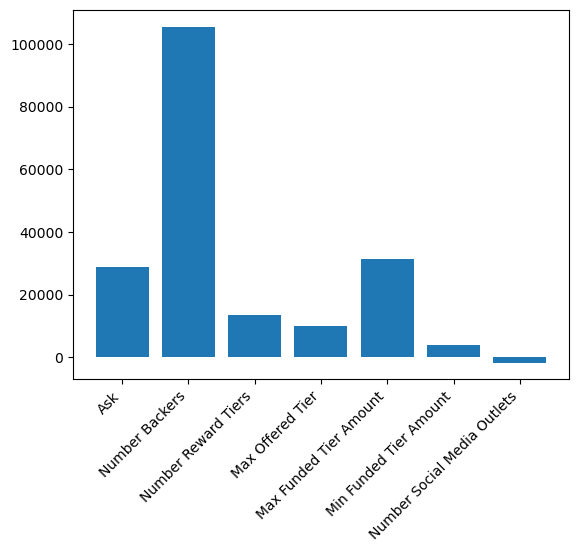

In [14]:
plt.bar(X_standardized.columns, en_reg.coef_)
plt.xticks(rotation = 45, ha = 'right');

In [15]:
X_pledgeExcess = df_linreg[list(filter(lambda x : x not in ['Ask', 'Pledged', 'PledgeExcess'], X_standardized.columns))]

In [16]:
y_pledgeExcess = df_linreg['PledgeExcess']

In [17]:
en_pledgeExcess = ElasticNet()
en_pledgeExcess.fit(X_pledgeExcess, y_pledgeExcess)

ElasticNet()

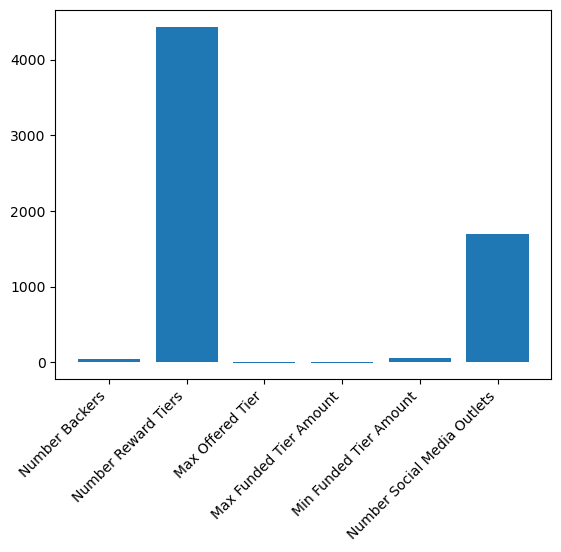

In [18]:
plt.bar(X_pledgeExcess.columns, en_pledgeExcess.coef_)
plt.xticks(rotation = 45, ha = 'right');

In [35]:
from interpret.glassbox import ExplainableBoostingRegressor as EBR
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
from interpret import show
set_visualize_provider(InlineProvider())

In [31]:
random_seed = 8
X_standardized_train, X_standardized_test, y_train, y_test = train_test_split(X_standardized, y, test_size = .2, random_state = random_seed)

In [32]:
ebr_pledged = EBR()

In [38]:
ebr_pledged.fit(X, y)

ExplainableBoostingRegressor()

In [41]:
show(ebr_pledged.explain_global())